# Skew-symmetric operator

A simple example of monotone operator that is not (even locally) strongly monotone is the skewed-symmetric operator [1], $F : \mathbb{R}^{MN} \to \mathbb{R}^{MN}$, which is described as follows

$$
\begin{equation}
    F(\mathbf{x}) = \begin{bmatrix} \mathbf{A}_1 & & \\ & \ddots & \\ & & \mathbf{A}_M \end{bmatrix} \mathbf{x}
\end{equation}
$$

for a given $M \in \mathbb{N}$, where $\mathbf{A}_i = \text{tril}(\mathbf{B}_i) - \text{triu}(\mathbf{B}_i)$, for some arbitrary $0 \preceq \mathbf{B}_i \in \mathbb{R}^{N \times N}$, for all $i = 1, \dots, M$. 

## References
[1] Bauschke, H. H., & Combettes, P. L. Convex Analysis and Monotone Operator Theory in Hilbert Spaces.


Using: eg
Using: popov
Using: fbf
Using: frb
Using: prg
Using: eag
Using: arg
Using: fogda
Using: graal
Using: agraal
Using: hgraal_1
Using: hgraal_2


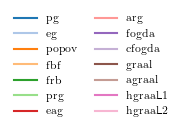

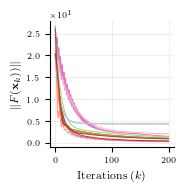

In [1]:
import numpy as np
import scipy as sp
import cvxpy as cp
import matplotlib.pyplot as plt

from utils import *
from monviso import VI

np.random.rand(2024)

M, N = 20, 10

# Create the problem variables
Bs = [random_positive_definite_matrix(0, 1, N) for _ in range(M)]
A = sp.linalg.block_diag(*[np.tril(B) - np.triu(B) for B in Bs])

F = lambda x: A @ x
L = np.linalg.norm(A, 2)

# Create the VI and the initial solution(s)
sso = VI(N * M, F)
x0 = [np.random.rand(N * M) for _ in range(2)]

# Solve the VI using the available algorithms
max_iter = 200
for algorithm, params in cases(x0, L, excluded={"pg", "cfogda"}).items():
    print(f"Using: {algorithm}")
    sol = sso.solution(
        algorithm,
        params,
        max_iter,
        eval_func=lambda x: np.linalg.norm(F(x), 2),
        log_path=f"logs/skew-symmetric/{algorithm}.log",
    )

plot_results(
    "logs/skew-symmetric",
    "figs/skew-symmetric.pdf",
    r"$\|F(\mathbf{x}_k))\|$",
)
